# Lead Company-Sector Mapping

 - Data Exploration and Preprocessing Script

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go

In [2]:
# reading data
data = pd.read_csv("../data/6lakh_pipeline_company_companies_data_2021-07-21.csv")

/mnt/bert_fine_tuning/cluster_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
# show top 5 entries by default
data.head()

,revenue,rank,stock_exchange,open_requisitions_range,stock_price,stock_symbol,_id,company_city,company_country,company_state,...,flag,nubela_id,linkedin_internal_id,tagline,linkedin_search_id,linkedin_employee_count,linkedin_follower_count,addr_upd_from,owler_id,partition_0
0,NaN,525172.0,NaN,NaN,NaN,NaN,5b073192599b311ccc11b101,San Francisco,United States,California,...,NaN,proleads-io,2936369.0,NaN,2936369,2.0,97.0,NaN,NaN,2021-07-21
1,NaN,988083.0,NaN,NaN,NaN,NaN,5b0737d1599b311ccc11c3f4,Madrid,Spain,Madrid,...,NaN,cramway,3075546.0,NaN,3075546,1.0,84.0,NaN,NaN,2021-07-21
2,NaN,383864.0,NaN,NaN,NaN,NaN,5b073905599b311ccc11c792,Sion,Switzerland,Valais,...,NaN,imperix,3328031.0,Imperix develops high-end control prototyping ...,3328031,9.0,1174.0,NaN,NaN,2021-07-21
3,NaN,148922.0,NaN,NaN,NaN,NaN,5b073d93599b311ccc11d524,Seoul,Korea Republic of,Seoul-t'ukpyolsi,...,NaN,yonhap-infomax,519567.0,NaN,519567,72.0,NaN,NaN,NaN,2021-07-21
4,NaN,247881.0,NaN,NaN,NaN,NaN,5b07485b599b311ccc11f4af,New York,United States,New York,...,NaN,saffron-fix,52765808.0,NaN,52765808,NaN,NaN,NaN,NaN,2021-07-21


In [4]:
# creating and saving a copy
# original_data = data.copy()

# 1. Variable Identification

Considering it a multiclass-classification problem.
- Target Variable : company_sector (in this notebook)
- i/p Variable : text column, Categorical, and Numerical

In [5]:
# getting column names for data
print("\n Columns in data- \n\n",data.columns, "\n\n No. of Unique columns - \n", data.columns.nunique())


 Columns in data- 

 Index(['revenue', 'rank', 'stock_exchange', 'open_requisitions_range',
       'stock_price', 'stock_symbol', '_id', 'company_city', 'company_country',
       'company_state', 'company_crunchbase_page', 'company_description',
       'company_facebook_page', 'company_funding', 'company_industry',
       'company_latest_funding_date', 'company_linkedin_page', 'company_name',
       'company_phone_number', 'company_products_services',
       'company_profile_image_url', 'company_sector', 'company_size',
       'company_twitter_page', 'company_type', 'company_website', 'ebitda',
       'fiscal_year', 'homepage_url', 'job_count', 'tags', 'lead_count',
       'updated_at', 'permalink', 'company_founded_at', 'geo_point',
       'company_continent', 'postal_code', 'company_address', 'sic_code',
       'naics_code', 'created_at', 'cb_id', 'revenue_range', 'flag',
       'nubela_id', 'linkedin_internal_id', 'tagline', 'linkedin_search_id',
       'linkedin_employee_count', '

In [6]:
# getting data-types
print("Data Types of the columns are:\n\n", data.dtypes)

Data Types of the columns are:

 revenue                        float64
rank                           float64
stock_exchange                  object
open_requisitions_range         object
stock_price                     object
stock_symbol                    object
_id                             object
company_city                    object
company_country                 object
company_state                   object
company_crunchbase_page         object
company_description             object
company_facebook_page           object
company_funding                float64
company_industry                object
company_latest_funding_date    float64
company_linkedin_page           object
company_name                    object
company_phone_number            object
company_products_services       object
company_profile_image_url       object
company_sector                  object
company_size                    object
company_twitter_page            object
company_type                   

In [7]:
# shape of the dataset
print("Shape of the dataset is :\n", data.shape)

Shape of the dataset is :
 (596769, 54)


There are 5.96769 lakh rows and 54 columns in the dataset.

 - Categorical Variables:stock_exchange,open_requisitions_range,stock_symbol, company_city, company_country, company_state, company_name, company_products_services, company_industry, company_size, company_type, tags, company_founded_at, geo_point, company_continent, postal_code, company_address, sic_code, naics_code, revenue_range, flag
 
 
 - Continuous Variables: ebitda,rank,stock_price,_id, company_funding, lead_count, job_count, cb_id, nubela_id, linkedin_internal_id, linkedin_search_id, linkedin_employee_count, linkedin_follower_count, addr_upd_from, owler_id
 - Text Data: company_description
 - Date : company_latest_funding_date, fiscal_year, updated_at, created_at, tagline, partition_0
 
 - Mobile Number : company_phone_number
 
 - Others(like Links, etc):company_crunchbase_page, company_facebook_page, company_linkedin_page, company_profile_image_url, company_twitter_page, company_website, homepage_url, permalink
 
    TARGET VARIABLE : `company_sector`

# 2. Missing Values

In [8]:
# checking missing data percentage in data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
print("\n ******* Missing Values in the Data ******* \n\n",missing_Data)


 ******* Missing Values in the Data ******* 

                               Total     Percent
flag                         596769  100.000000
owler_id                     596769  100.000000
stock_price                  596529   99.959783
open_requisitions_range      593794   99.501482
stock_exchange               593189   99.400103
stock_symbol                 593189   99.400103
revenue                      589647   98.806573
ebitda                       589459   98.775070
addr_upd_from                584058   97.870030
fiscal_year                  561886   94.154690
naics_code                   474667   79.539487
sic_code                     474661   79.538481
tags                         419008   70.212762
geo_point                    364239   61.035174
tagline                      331959   55.626046
postal_code                  230507   38.625833
company_products_services    214661   35.970535
company_twitter_page         212575   35.620986
linkedin_follower_count      211450   35

- dropping columns where missing values >40 %

# 3. Univariate Analysis

- Categorical Variables

In [10]:
def get_bar_and_percent(df,column_name,y_label,x_label):
    
    print("\n\n ****** Percentage Wise Variable Distribution ********* \n")
    print(df[column_name].value_counts(normalize=True)*100)   # percentage wise
    if df[column_name].nunique()<70:
        print("\n\n ****** Bar Graph for - "+column_name+" ******\n")
        fig = plt.figure(figsize = (15, 5))
        # creating the bar plot
        df[column_name].value_counts(normalize=False).plot.bar(title = column_name) 
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.show()
    else:
        c = df[column_name].nunique()
        print("\n ------------ Number of Unique entries: "+str(c)+"  are too large to display ------------\n")
    
    return True



 ****** Percentage Wise Variable Distribution ********* 

nasdaq     42.681564
cve        20.307263
asx        10.055866
nse         8.100559
tse         7.346369
nyse        4.469274
Nyse        1.145251
lon         0.810056
hel         0.642458
nysemkt     0.586592
Nasdaq      0.586592
epa         0.418994
otcqb       0.307263
otcpink     0.279330
tlv         0.279330
Asx         0.139665
ebr         0.139665
otcmkts     0.111732
tsx         0.111732
Otcpink     0.111732
Jse         0.111732
otcqx       0.083799
Lon         0.083799
Bom         0.083799
Epa         0.083799
Hkg         0.055866
ose         0.055866
ams         0.055866
etr         0.055866
Etr         0.055866
lse         0.027933
Idx         0.027933
Swx         0.027933
bme         0.027933
Tyo         0.027933
bit         0.027933
Sgx         0.027933
Nysemkt     0.027933
idx         0.027933
Bcba        0.027933
Klse        0.027933
fra         0.027933
bkk         0.027933
Sek         0.027933
Ebr         0.02

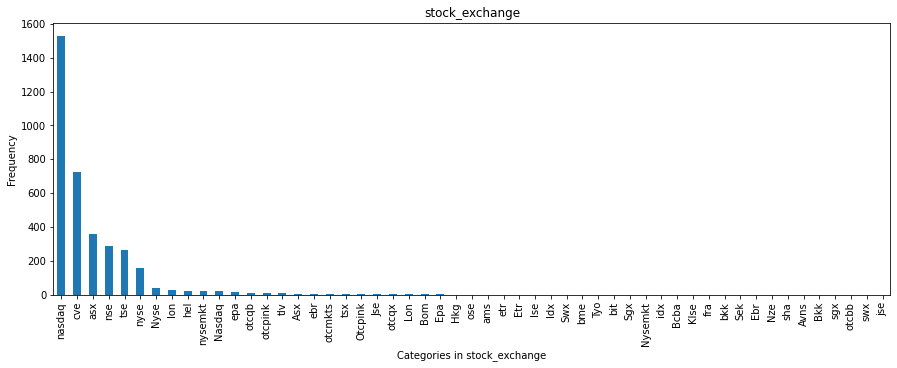

True

In [11]:
get_bar_and_percent(data,"stock_exchange","Frequency","Categories in stock_exchange")



 ****** Percentage Wise Variable Distribution ********* 

Unknown       30.487395
1-10          23.126050
11-50         19.394958
51-200        16.470588
201-500        5.411765
501-1000       2.789916
1001-5000      2.050420
10000+         0.201681
5001-10000     0.067227
Name: open_requisitions_range, dtype: float64


 ****** Bar Graph for - open_requisitions_range ******



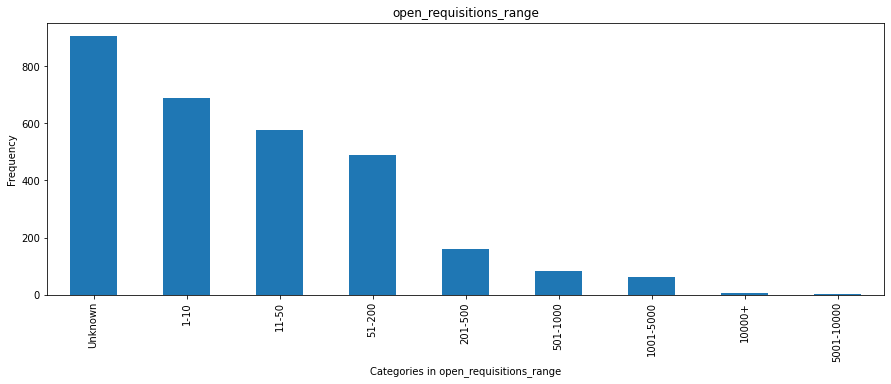

True

In [12]:
# open_requisitions_range
get_bar_and_percent(data,"open_requisitions_range","Frequency","Categories in open_requisitions_range")

In [13]:
# stock_symbol
get_bar_and_percent(data,"stock_symbol","Frequency","Categories in stock_symbol")



 ****** Percentage Wise Variable Distribution ********* 

ORLY        0.027933
NSX.V       0.027933
STG         0.027933
NSPR        0.027933
EOLS        0.027933
              ...   
PBYI        0.027933
ACGL        0.027933
OUT1V.HE    0.027933
Hog         0.027933
GNUS        0.027933
Name: stock_symbol, Length: 3580, dtype: float64

 ------------ Number of Unique entries: 3580  are too large to display ------------



True

In [14]:
# company_city
get_bar_and_percent(data,"company_city","Frequency","Categories in company_city")



 ****** Percentage Wise Variable Distribution ********* 

London           3.565437
New York         3.365380
San Francisco    2.149835
Paris            1.123118
Chicago          1.073017
                   ...   
Greenhaugh       0.000173
Francheleins     0.000173
La Napoule       0.000173
Avranches        0.000173
Beauchamp        0.000173
Name: company_city, Length: 27545, dtype: float64

 ------------ Number of Unique entries: 27545  are too large to display ------------



True

In [15]:
# company_country
get_bar_and_percent(data,"company_country","Frequency","Categories in company_country")



 ****** Percentage Wise Variable Distribution ********* 

United States                       47.845466
United Kingdom                       8.846560
India                                4.968656
Canada                               4.378246
France                               2.945029
                                      ...    
American Samoa                       0.000171
Vanuatu                              0.000171
Saint Martin                         0.000171
Saint Vincent and the Grenadines     0.000171
Aland Islands                        0.000171
Name: company_country, Length: 208, dtype: float64

 ------------ Number of Unique entries: 208  are too large to display ------------



True

In [16]:
# company_state
get_bar_and_percent(data,"company_state","Frequency","Categories in company_state")



 ****** Percentage Wise Variable Distribution ********* 

California      10.820767
New York         5.041409
England          3.551803
Texas            3.240521
Florida          2.723454
                  ...    
Banghazi         0.000174
Tak              0.000174
Tagbilaran       0.000174
Westmoreland     0.000174
Kogi             0.000174
Name: company_state, Length: 2062, dtype: float64

 ------------ Number of Unique entries: 2062  are too large to display ------------



True

In [17]:
# company_name
get_bar_and_percent(data,"company_name","Frequency","Categories in company_name")



 ****** Percentage Wise Variable Distribution ********* 

Sphere                  0.001173
Switch                  0.001173
Fathom                  0.001173
Shift                   0.001173
Emerge                  0.001173
                          ...   
NuWest Group            0.000168
CoWorkTampa             0.000168
StageVoyage             0.000168
Poly Canyon Ventures    0.000168
Elwoodz                 0.000168
Name: company_name, Length: 593322, dtype: float64

 ------------ Number of Unique entries: 593322  are too large to display ------------



True

In [18]:
# company_products_services
get_bar_and_percent(data,"company_products_services","Frequency","Categories in company_products_services")



 ****** Percentage Wise Variable Distribution ********* 

[Venture Capital]                                                                                                                                                                                                                                                                    0.028003
[Private Equity]                                                                                                                                                                                                                                                                     0.026956
[Real Estate]                                                                                                                                                                                                                                                                        0.020675
[Education]                                                                       

True

In [19]:
# company_industry
get_bar_and_percent(data,"company_industry","Frequency","Categories in company_industry")



 ****** Percentage Wise Variable Distribution ********* 

Information Technology and Services    12.337437
Computer Software                       8.136314
Internet                                6.675615
Marketing and Advertising               6.003998
Financial Services                      3.772481
                                         ...    
Tobacco                                 0.012400
Alternative Dispute Resolution          0.011730
Ranching                                0.008881
Judiciary                               0.007541
Legislative Office                      0.003351
Name: company_industry, Length: 147, dtype: float64

 ------------ Number of Unique entries: 147  are too large to display ------------



True



 ****** Percentage Wise Variable Distribution ********* 

1-10       35.519463
11-50      33.200937
51-200     16.399877
201-500     6.711046
1k-5k       3.320441
501-1k      3.018599
10k+        1.074684
5k-10k      0.754954
Name: company_size, dtype: float64


 ****** Bar Graph for - company_size ******



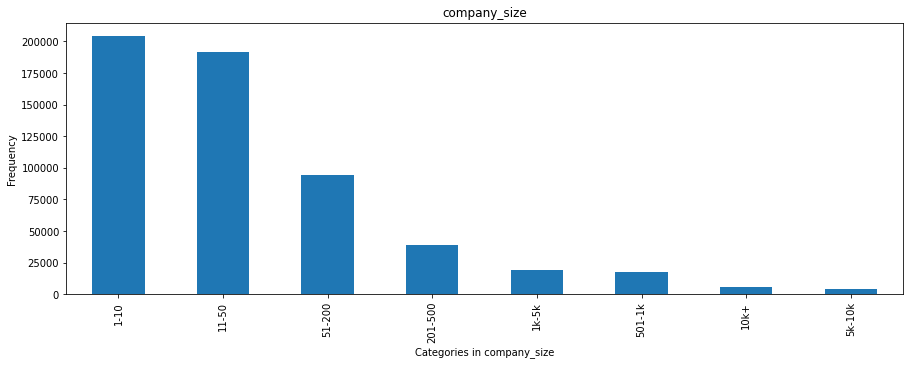

True

In [20]:
# company_size
get_bar_and_percent(data,"company_size","Frequency","Categories in company_size")



 ****** Percentage Wise Variable Distribution ********* 

Private                    70.341714
Public                     12.355012
Partnership                 6.242665
Nonprofit                   4.115946
Sole Proprietorship         4.048596
Educational Institution     1.163887
Self-Employed               1.136787
Government Agency           0.595393
Name: company_type, dtype: float64


 ****** Bar Graph for - company_type ******



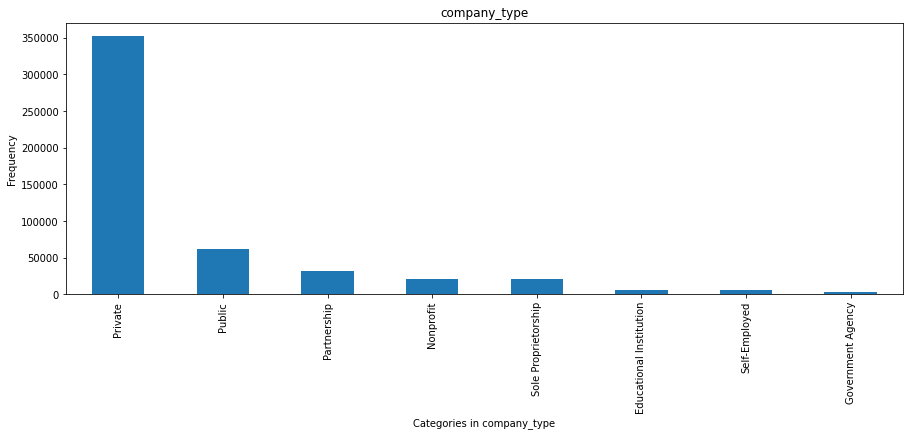

True

In [21]:
# company_type
get_bar_and_percent(data,"company_type","Frequency","Categories in company_type")

In [22]:
# tags
get_bar_and_percent(data,"tags","Frequency","Categories in tags")



 ****** Percentage Wise Variable Distribution ********* 

[Oracle Suite]                                                                                                                                 23.364518
[eCommerce businesses by technologies]                                                                                                         16.013636
[eCommerce businesses]                                                                                                                         12.085891
[Citrix Suite]                                                                                                                                  5.967563
[Founded Before 2019]                                                                                                                           5.027537
                                                                                                                                                 ...    
[NWCDC Exhibitors 2019

True

In [23]:
# company_founded_at
get_bar_and_percent(data,"company_founded_at","Frequency","Categories in company_founded_at")



 ****** Percentage Wise Variable Distribution ********* 

2015.0    6.493504
2014.0    6.289453
2013.0    5.821408
2012.0    5.584101
2016.0    5.306764
            ...   
1570.0    0.000205
1719.0    0.000205
1563.0    0.000205
1741.0    0.000205
1615.0    0.000205
Name: company_founded_at, Length: 477, dtype: float64

 ------------ Number of Unique entries: 477  are too large to display ------------



True

In [24]:
# geo_point
get_bar_and_percent(data,"geo_point","Frequency","Categories in geo_point")



 ****** Percentage Wise Variable Distribution ********* 

51.50,-0.12      4.901303
40.71,-74.00     4.731002
37.77,-122.41    3.116587
48.85,2.34       1.761063
41.85,-87.65     1.545177
                   ...   
52.61,1.45       0.000430
40.73,-79.74     0.000430
47.26,9.50       0.000430
-38.2,145.15     0.000430
48.20,-116.54    0.000430
Name: geo_point, Length: 12849, dtype: float64

 ------------ Number of Unique entries: 12849  are too large to display ------------



True



 ****** Percentage Wise Variable Distribution ********* 

North America    52.752992
Europe           29.230601
Asia             12.429773
Oceania           2.682016
South America     1.769175
Africa            1.135443
Name: company_continent, dtype: float64


 ****** Bar Graph for - company_continent ******



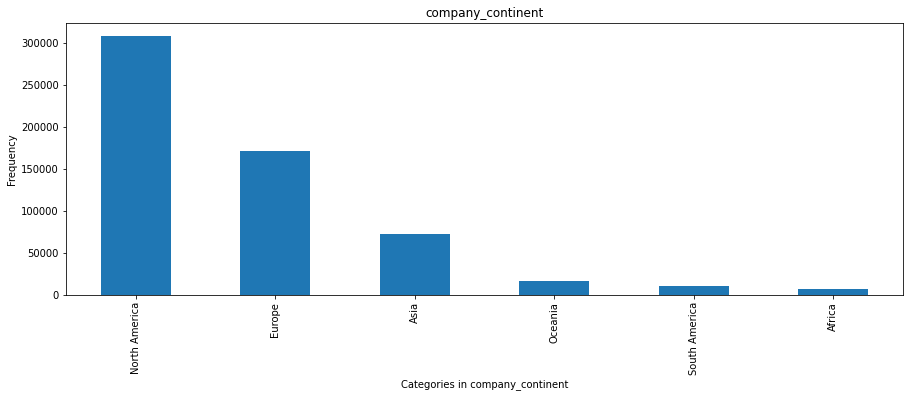

True

In [25]:
# company_continent
get_bar_and_percent(data,"company_continent","Frequency","Categories in company_continent")

In [26]:
# postal_code
get_bar_and_percent(data,"postal_code","Frequency","Categories in postal_code")



 ****** Percentage Wise Variable Distribution ********* 

10001         0.342378
94107         0.334733
94105         0.334187
2000          0.328453
10018         0.290775
                ...   
30300         0.000273
77799         0.000273
5611ED        0.000273
04953         0.000273
89141-3409    0.000273
Name: postal_code, Length: 85631, dtype: float64

 ------------ Number of Unique entries: 85631  are too large to display ------------



True

In [27]:
# company_address
get_bar_and_percent(data,"company_address","Frequency","Categories in company_address")



 ****** Percentage Wise Variable Distribution ********* 

City And County Of San Francisco    0.164858
Los Angeles County                  0.102683
Paris                               0.051059
Cook County                         0.043522
King County                         0.038059
                                      ...   
Kimbolton House Mount Beacon        0.000188
Rambla Catalunya 47, 2º             0.000188
Gropegã¥rdsgatan 11 E-porten        0.000188
7412 Elsie Ave                      0.000188
6329 Conleth Circle                 0.000188
Name: company_address, Length: 486983, dtype: float64

 ------------ Number of Unique entries: 486983  are too large to display ------------



True

In [28]:
# sic_code
get_bar_and_percent(data,"sic_code","Frequency","Categories in sic_code")



 ****** Percentage Wise Variable Distribution ********* 

[7389]                                                                            5.572116
[7371]                                                                            4.120942
[8742]                                                                            3.757330
[8748]                                                                            2.672225
[7379]                                                                            1.950732
                                                                                    ...   
[5311, 5719, 5331, 5999, 5651, 6512]                                              0.000819
[6553, 8322, 8111]                                                                0.000819
[7231, 3993, 2731, 5812, 5947, 7221, 7389, 5251, 1629, 5712, 5945, 9999, 5191]    0.000819
[8243, 8331]                                                                      0.000819
[8222, 5812, 7389, 9121]      

True

In [29]:
# naics_code
get_bar_and_percent(data,"naics_code","Frequency","Categories in naics_code")



 ****** Percentage Wise Variable Distribution ********* 

[443142]                                        3.183404
[541511]                                        2.908224
[999990]                                        2.351313
[561990]                                        1.996691
[561499]                                        1.836989
                                                  ...   
[4431411, 333911]                               0.000819
[611420, 5415121, 4431424]                      0.000819
[4543901, 311812, 4244900, 3118120, 3118110]    0.000819
[5413301, 8139100, 5416140]                     0.000819
[3113520, 4452920, 5615200, 311340, 531130]     0.000819
Name: naics_code, Length: 29344, dtype: float64

 ------------ Number of Unique entries: 29344  are too large to display ------------



True



 ****** Percentage Wise Variable Distribution ********* 

Unknown      39.912764
1M-10M       24.537468
<1M          22.294053
10M-50M       8.628799
100M-500M     1.823821
50M-100M      1.593917
1B-10B        0.588000
500M-1B       0.506226
10B+          0.114952
Name: revenue_range, dtype: float64


 ****** Bar Graph for - revenue_range ******



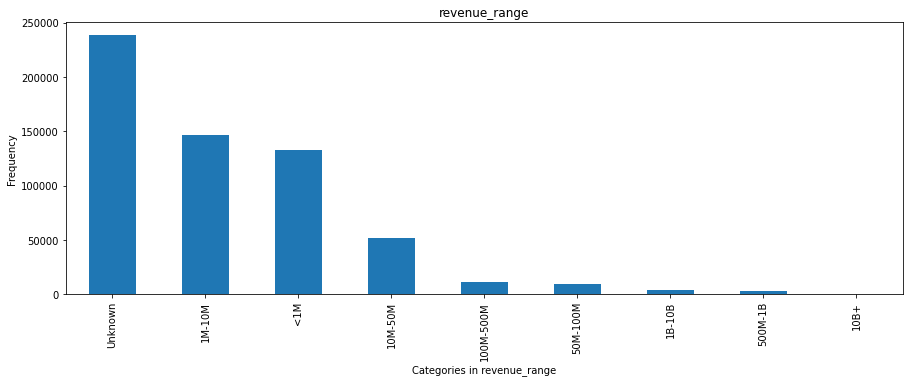

True

In [30]:
# revenue_range
get_bar_and_percent(data,"revenue_range","Frequency","Categories in revenue_range")